In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib_venn import venn2
import string


In [5]:
eda = pd.read_csv("ReadytoETA.csv")

/var/folders/n7/x0fwwp8x0jvgxqnmqjfvghqh0000gn/T/ipykernel_40366/1456211550.py:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  eda = pd.read_csv("ReadytoETA.csv")


In [6]:
eda

,budget,id_original,original_language,overview,popularity,revenue,runtime,status,tagline,title,vote_average,vote_count,id_genre,genres,production_companies,id,iso_3166_1,name_production_countries
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,16.0,Animation,Pixar Animation Studios,3.0,US,United States of America
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,16.0,Animation,Pixar Animation Studios,3.0,US,United States of America
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,16.0,Animation,Pixar Animation Studios,3.0,US,United States of America
3,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,35.0,Comedy,TriStar Pictures,559.0,US,United States of America
4,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,35.0,Comedy,TriStar Pictures,559.0,US,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178519,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0,35.0,Comedy,Foxboro Entertainment,85122.0,JP,Japan
178520,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0,35.0,Comedy,Foxboro Entertainment,85122.0,JP,Japan
178521,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0,35.0,Comedy,Foxboro Entertainment,85122.0,JP,Japan
178522,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0,18.0,Drama,NaN,NaN,KG,Kyrgyz Republic


In [7]:
eda.columns


Index(['budget', 'id_original', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_genre', 'genres', 'production_companies', 'id',
       'iso_3166_1', 'name_production_countries'],
      dtype='object')

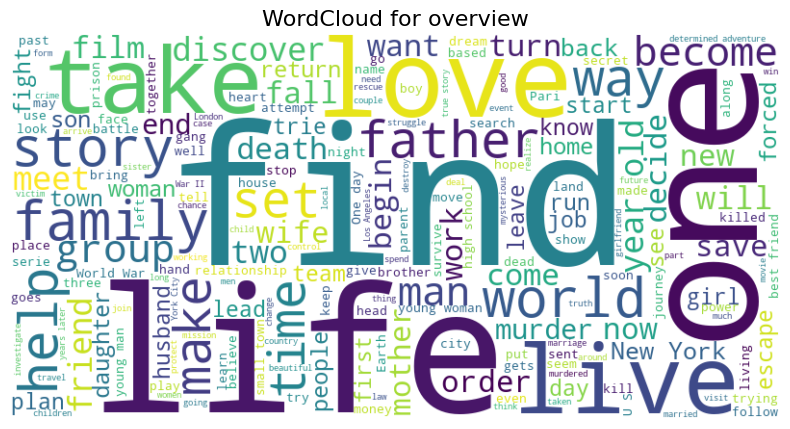

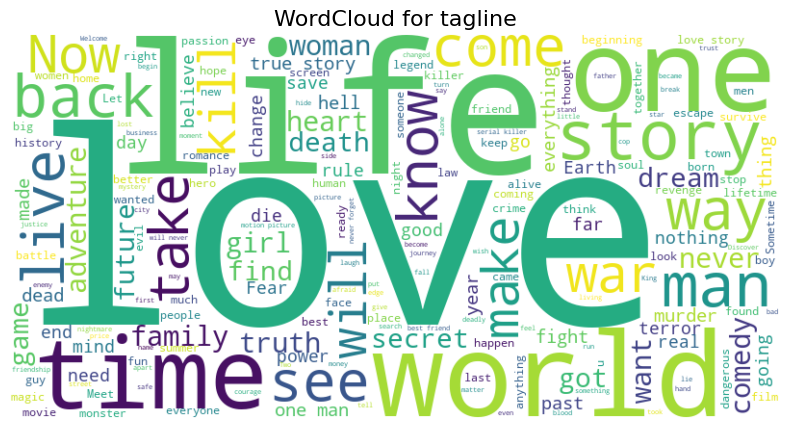

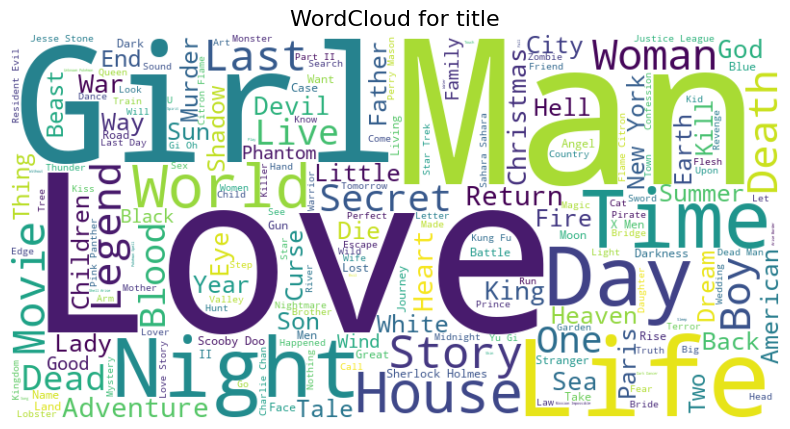

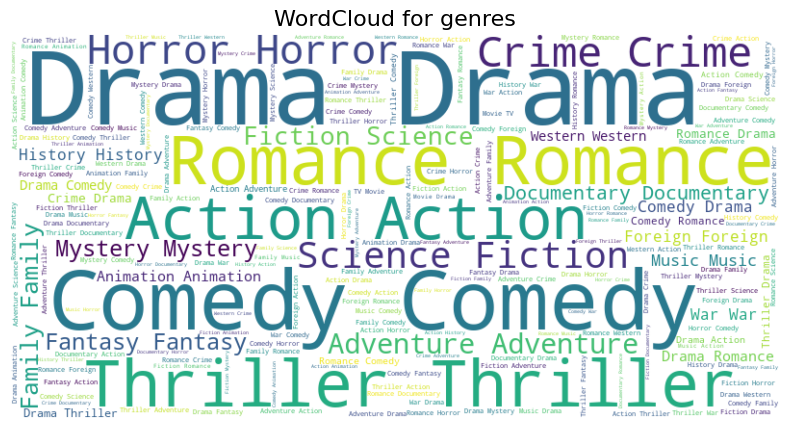

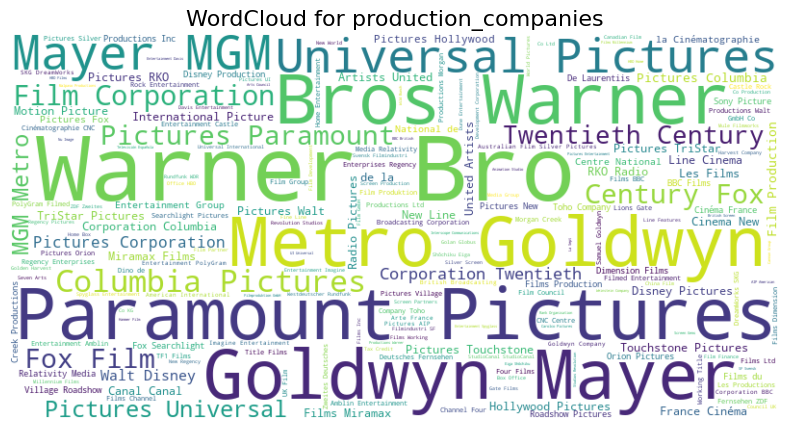

In [8]:
# Función para crear una nube de palabras por columna
def generate_wordcloud(df, column):
    # Si la columna tiene listas o diccionarios, los convertimos a texto
    if df[column].apply(lambda x: isinstance(x, list)).any():
        text = " ".join(" ".join(item['name'] for item in items if isinstance(item, dict)) for items in df[column] if isinstance(items, list))
    else:
        text = " ".join(df[column].dropna().astype(str))  # Eliminamos NaN
    
    # Generamos la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Mostramos la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {column}', fontsize=16)
    plt.axis('off')
    plt.show()

# Especificamos las columnas de interés
columns_of_interest = ['overview', 'tagline', 'title', 'genres', 'production_companies']

# Generamos una nube de palabras para cada columna
for col in columns_of_interest:
    generate_wordcloud(eda, col)

In [15]:
# Función para limpiar y dividir el texto en palabras
def clean_text_column(column):
    # Elimina signos de puntuación, convierte todo a minúsculas y separa por palabras
    column = column.dropna().str.lower()
    column = column.str.translate(str.maketrans('', '', string.punctuation))
    words = column.str.split().sum()  # Convierte la columna en una lista de palabras
    return words

# Procesa varias columnas de texto
def get_common_words(df, columns, top_n=10):
    all_words = []
    
    # Extraer palabras de cada columna
    for col in columns:
        words = clean_text_column(df[col])
        all_words += words
    
    # Contar la frecuencia de todas las palabras
    word_count = Counter(all_words)
    
    # Obtener las palabras más comunes
    most_common_words = word_count.most_common(top_n)
    return most_common_words

# Columnas de texto que quieres analizar
text_columns = ['overview', 'tagline', 'title', 'genres', 'production_companies', 'name_production_countries']

# Calcula las 10 palabras más comunes entre las columnas seleccionadas
common_words = get_common_words(eda, text_columns, top_n=10)

# Mostrar las palabras más comunes
print("Las palabras más comunes son:")
for word, count in common_words:
    print(f"{word}: {count} veces")

# Graficar las palabras más comunes
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('Top 10 palabras más comunes entre las columnas')
plt.xticks(rotation=45)
plt.show()